<a href="https://colab.research.google.com/github/deena19liebert/Data-Exploration-And-Visualization/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv

--2025-06-12 03:32:54--  https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 477907 (467K) [text/plain]
Saving to: ‘sms.tsv’

sms.tsv             100%[===================>] 466.71K  --.-KB/s    in 0.01s   

2025-06-12 03:32:55 (32.4 MB/s) - ‘sms.tsv’ saved [477907/477907]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('sms.tsv', sep='\t', header=None, names=['label', 'message'])

print("Dataset shape:", df.shape)
print(df['label'].value_counts())
df.head()

Dataset shape: (5572, 2)
label
ham     4825
spam     747
Name: count, dtype: int64


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:

df['message_length'] = df['message'].apply(len)
df['num_words'] = df['message'].apply(lambda x: len(x.split()))
df['num_punct'] = df['message'].apply(lambda x: sum([1 for c in x if c in string.punctuation]))

df.head()


,label,message,message_length,num_words,num_punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,9
1,ham,Ok lar... Joking wif u oni...,29,6,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,6
3,ham,U dun say so early hor... U c already then say...,49,11,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,2


<ipython-input-4-1038575369>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='pastel')


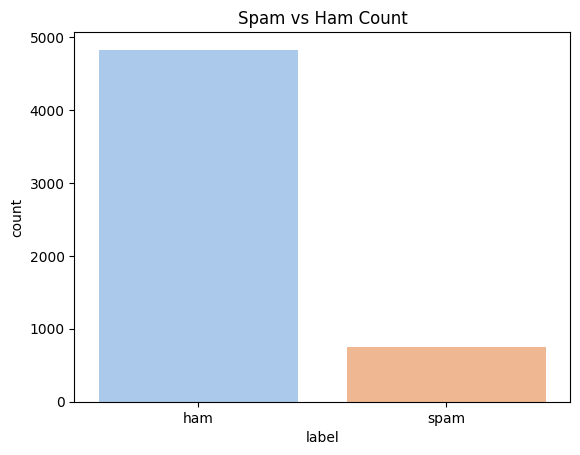

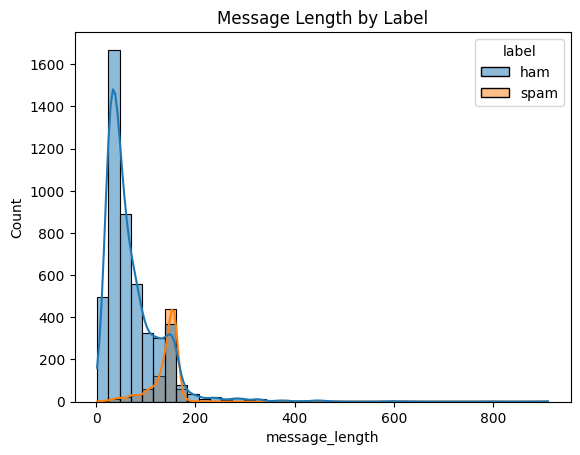

In [4]:
sns.countplot(x='label', data=df, palette='pastel')
plt.title("Spam vs Ham Count")
plt.show()

sns.histplot(data=df, x='message_length', hue='label', kde=True, bins=40)
plt.title("Message Length by Label")
plt.show()


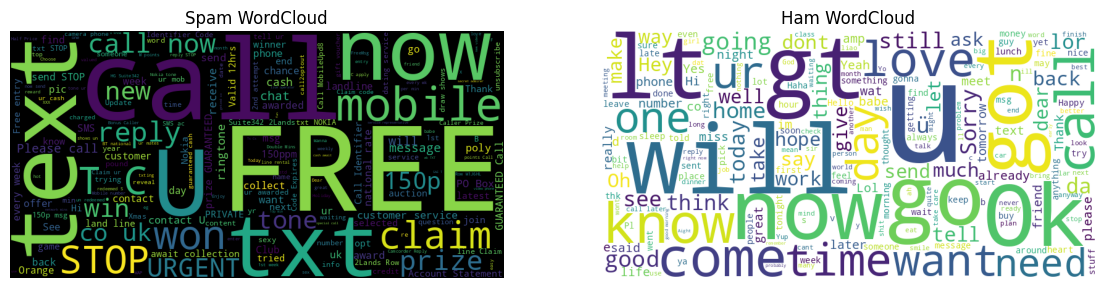

In [5]:
spam_words = ' '.join(df[df['label']=='spam']['message'])
ham_words = ' '.join(df[df['label']=='ham']['message'])

spam_wc = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(spam_wc)
plt.axis('off')
plt.title('Spam WordCloud')

plt.subplot(1,2,2)
plt.imshow(ham_wc)
plt.axis('off')
plt.title('Ham WordCloud')

plt.show()


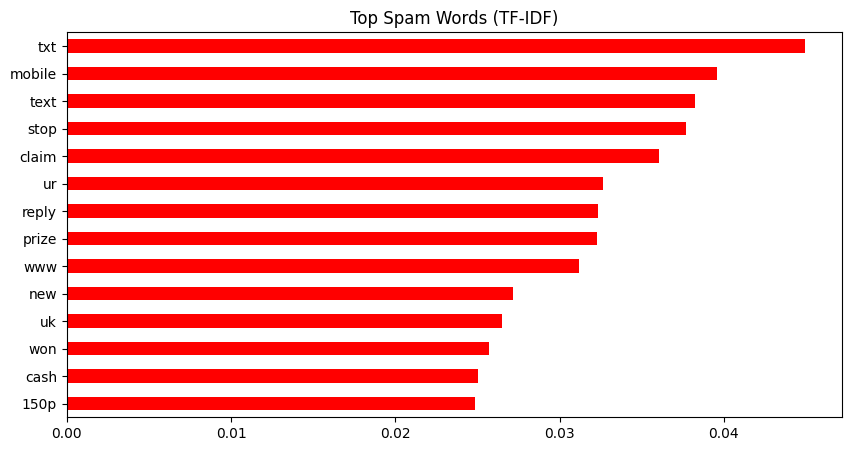

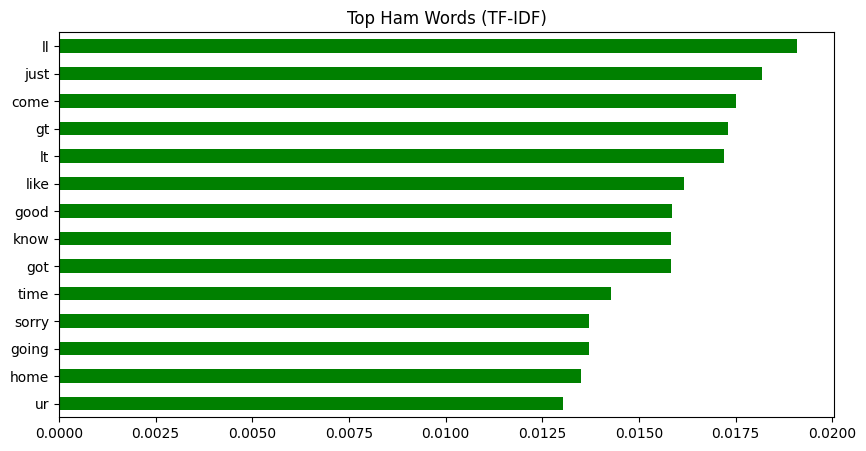

In [8]:

spam_top = tfidf_df[df['label']=='spam'].drop(columns=['label']).mean().sort_values(ascending=False)[1:15]
ham_top = tfidf_df[df['label']=='ham'].drop(columns=['label']).mean().sort_values(ascending=False)[1:15]

plt.figure(figsize=(10,5))
spam_top.plot(kind='barh', color='red', title='Top Spam Words (TF-IDF)')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10,5))
ham_top.plot(kind='barh', color='green', title='Top Ham Words (TF-IDF)')
plt.gca().invert_yaxis()
plt.show()


In [9]:
df.to_csv("cleaned_sms_dataset.csv", index=False)
